In [1]:
from torch.utils.data import DataLoader, Dataset
import torch
import torchvision.transforms as transforms
import numpy as np
import torch.nn as nn
import os
import cv2
import matplotlib.pyplot as plt

In [2]:
device = torch.device("cuda")

In [3]:
transform = transforms.Compose([
    #  transforms.ToTensor(),
    #  transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    ])

class FrameInterpolationDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.samples = []

        for subdir in sorted(os.listdir(root_dir)):
            subdir_path = os.path.join(root_dir, subdir)

            frame_path1 = os.path.join(subdir_path, "frame1.jpg")
            frame_path2 = os.path.join(subdir_path, "frame2.jpg")
            frame_path3 = os.path.join(subdir_path, "frame3.jpg")

            frame1 = cv2.imread(frame_path1)
            frame2 = cv2.imread(frame_path2)
            frame3 = cv2.imread(frame_path3)

            self.samples.append((frame1, frame2, frame3))

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        frame1, frame2, frame3 = self.samples[idx]

        if self.transform:
            frame1 = self.transform(frame1)
            frame2 = self.transform(frame2)
            frame3 = self.transform(frame3)

        x = (frame1, frame3)
        y = frame2
        return x, y

In [4]:
images_train = FrameInterpolationDataset("./atd_12k/datasets/train_128px", transform=transform)

In [5]:
trainloader = DataLoader(images_train, batch_size=32, shuffle=True, num_workers=4)

In [6]:
def show(img):
    # img = (img + 1) / 2
    # img = np.transpose(img, (1, 2, 0))
    plt.imshow(img)
    plt.axis('off')
    plt.show()

def show_3_frames(x, y):
    fig, axes = plt.subplots(1, 3, figsize=(10, 3))

    img = x[0]
    # img = (img + 1) / 2
    # img = np.transpose(img, (1, 2, 0))
    # img = (img.numpy() * 255).astype(np.uint8)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    axes[0].imshow(img)

    img = y
    # img = (img + 1) / 2
    # img = np.transpose(img, (1, 2, 0))
    # img = (img.numpy() * 255).astype(np.uint8)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    axes[1].imshow(img)

    img = x[1]
    # img = (img + 1) / 2
    # img = np.transpose(img, (1, 2, 0))
    # img = (img.numpy() * 255).astype(np.uint8)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    axes[2].imshow(img)

    plt.show()

In [7]:
x, y = images_train[412]

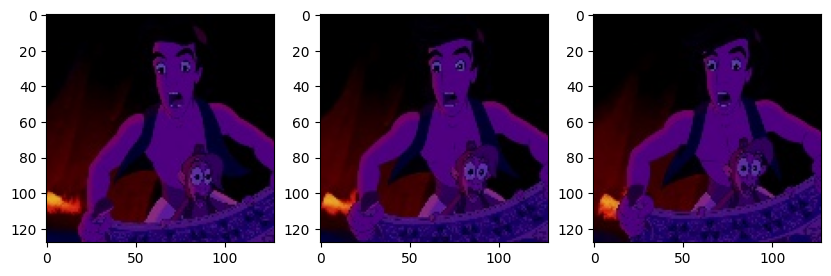

In [8]:
show_3_frames(x, y)

Wykorzystany memflow do generowania optical flow


github.com/DQiaole/MemFlow

In [9]:
from my_evaluate import inference
from MemFlow.configs.sintel_memflownet import get_cfg

please consider installing flash attention for faster inference


MemFlowNet_skflow
no flash attention installed
[Using basicencoder as context encoder]
[Using basicencoder as feature encoder]
[Using GMA-SK2]
[Using corr_fn default]


/home/tomek/Documents/SIGK/lab5/my_evaluate.py:37: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(cfg.restore_ckpt, map_location='cpu')
/home/tomek/.local/l

MemFlowNet_skflow
[Using basicencoder as context encoder]
[Using basicencoder as feature encoder]
[Using GMA-SK2]
[Using corr_fn default]


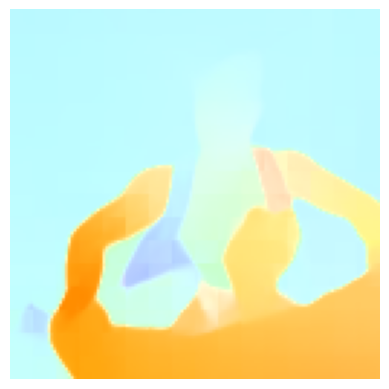

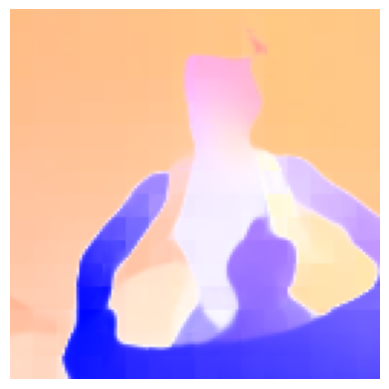

In [10]:
cfg = get_cfg()

cfg.name = "MemFlowNet"
cfg.restore_ckpt = "MemFlow/ckpts/MemFlowNet_sintel.pth"
cfg.vis_dir = "./"

a = inference(cfg, x[1], x[0])
b = inference(cfg, x[0], x[1])

show(a)
show(b)